In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#подгружаем базу данных
ufo = pd.read_csv('D://Загрузки/ufo.csv', engine='python')

#найдем номера строк базы, не подходящих по широте и долготе
rng = len(ufo['latitude'])
rows_for_drop = []

for k in range(rng):    
    if str(ufo.at[k, 'latitude']).replace('.','').replace('-','').isnumeric():
        ufo.at[k, 'latitude'] = float(str(ufo.at[k, 'latitude']))
        if not ((8 < float(str(ufo.at[k, 'latitude'])))&(float(str(ufo.at[k, 'latitude'])) < 32)):
            rows_for_drop.append(k)
            continue
    else:
        rows_for_drop.append(k)
        continue
    
    if str(ufo.at[k, 'longitude ']).replace('.','').replace('-','').isnumeric():
        ufo.at[k, 'longitude '] = float(str(ufo.at[k, 'longitude ']))
        if not ((71 < float(str(ufo.at[k, 'longitude '])))&(float(str(ufo.at[k, 'longitude '])) < 89)):
            rows_for_drop.append(k)
            continue
    else:
        rows_for_drop.append(k)
        continue
    if str(ufo.at[k, 'duration (seconds)']).isnumeric():
        ufo.at[k, 'duration (seconds)'] = int(str(ufo.at[k, 'duration (seconds)']))
    else:
        rows_for_drop.append(k)
        continue

#удаляем из базы всё лишнее, останется порядка 200 строк
ufo = ufo.drop(rows_for_drop)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


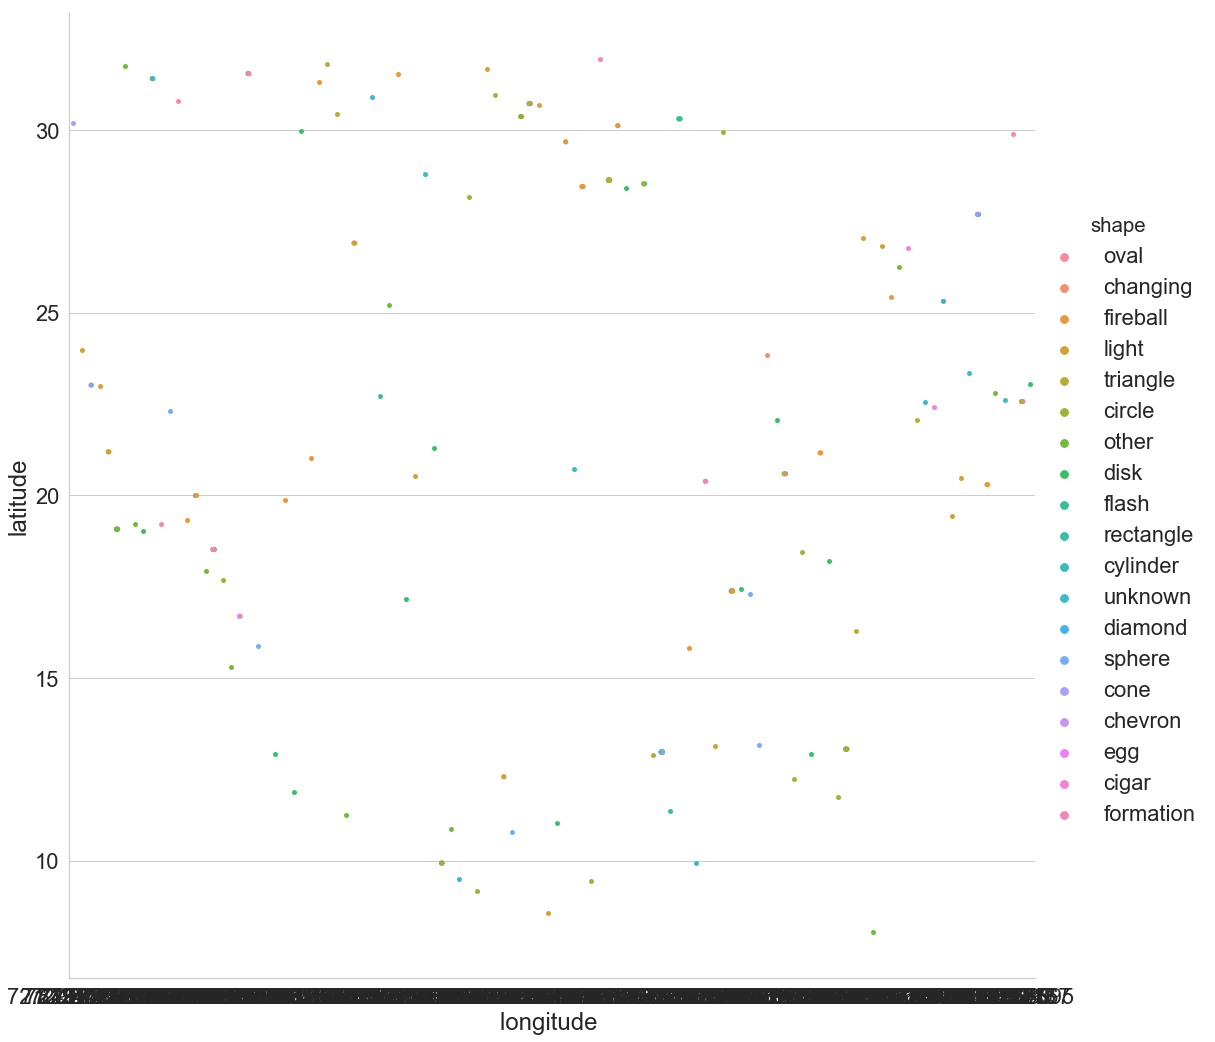

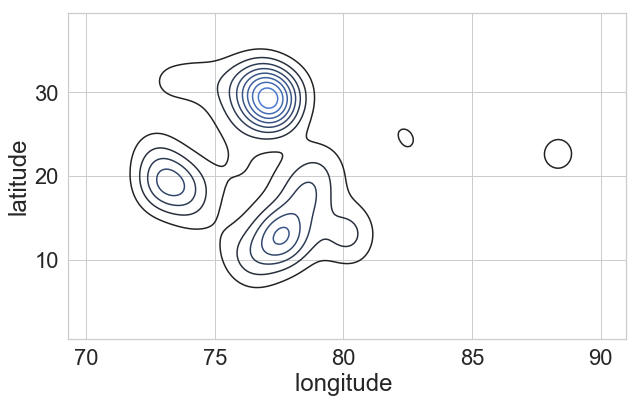

In [9]:
#картинка с точками НЛО
sns.set(style='whitegrid', palette='muted', font_scale=2)
sns.catplot(x='longitude ', y='latitude', hue='shape', data=ufo, height=15)

#картинка с распределением плотностей по местности Индии
plt.subplots(figsize=(10,6))
sns.kdeplot(ufo['longitude '], ufo['latitude'], gridsize=200);